In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import sem
import statistics

plt.style.use('untitled1.txt')

# Objective

The objective of this first part was to unerstand Malus' law in the context of the experiment.

# Experimental method

## Experimental set-up

The original apparatus, without any of the polarising plates, is a laser aligned with a detector (I just checked that the 2 were indeed aligned by covering the detector with a sheet of paper to block the light from the laser, to check the beam was indeed arriving on the detector. I didn't do more because the demonstrator told me not to because of the age of the equipment).

Here, we want to confirm Malus' law for a linearly polarised beam incident on a linear polariser, which is equation (1) in the lab script

$$P(\theta) = P_0 \cos^2(\theta)$$

where $P(\theta)$ is the power transmitted at angle $\theta$ between the transmission axis of the polariser and the orientation of the polarised light and $P_0$ is the power output when the two are aligned (ie maximum power output).

This means that we will need two polarisers here:
- the first one is used to turn the laser beam into linearly polarised light, as a laser beam is not polarised in general.
- the second serves as an analyser, ie helps us determine the state of polarisation (SOP) of the laser beam by using Malus' law.

I first adjust the polariser so that it transmits the maximum amount of light from the laser beam, about 950 counts here.

We then want to set up the analyser and polariser such that their transmission axes are aligned at 0&deg;, ie we get a maximum power output at 0&deg;. To do that, I adjusted the scale so that we got minimum transmission when the polariser was at 0&deg and the analyser at 90&deg;. I did this because the detector fluctuates less at lower powers than at higher powers, so it's easier to know when we have a minimum. I don't find 0 counts for the minimum because of the background from ambient light (I find 5). The reading error on the detector is 1 count, but I don't know the error on the detector. The reading error on the angle is 1&deg;. Note that the polariser and analyser combination absorb and block light, even at maximum transmission, so the light becomes dimmer than when there is only the polariser, or no plates at all.

## Measurements

Background count was 5.

To check Malus' law, we need to measure the power output for a range of analyser angles of a single incident SOP. The best way to do that is to keep the angle of the polariser fixed and rotate the analyser around 180&deg; (as we have a cosine term in the equation, so we don't need any measurements in the 3rd or fourth quadrants). I repeated the measurements 3 times to reduce error, especially that the detector fluctuates a lot for higher power values.

We then get:

**Table 1**: Output power measured of a polarised beam for different analyser angles

analyser angle (&deg;) | output power 1 | output power 2 | output power 3
:--:|:---:|:---:|:---:
0   | 959 | 958 | 960
20  | 840 | 839 | 832
40  | 551 | 555 | 551
60  | 236 | 232 | 230
80  | 29  | 28  | 30
90  | 5   | 4   | 4
100 | 38  | 39  | 39
120 | 254 | 252 | 251
140 | 573 | 571 | 570
160 | 846 | 847 | 850
180 | 955 | 955 | 955

These were not background subtracted, but we clearly see that there is a minimum at 90&deg; here, as expected, and that is is at 0 ($\pm$ the reading error) when we subtract the background, which is all as expected.

# Data Analysis

Now, we want to see if our measurement match up with what we know about Malus' law. To do this, we must therefore plot the background subtracted plot of our measurements. First, we need to read the data.

In [4]:
#load the data

angle, counts1, counts2, counts3 = np.loadtxt('Measurements_paragraph_2.csv', delimiter=',', skiprows=4, unpack = True)
    # first column was angles
    # other columns were all our 3 sets of measurements
    
#make a note of the errors
background=5                   #background value
angle_err=np.ones_like(angle)  #reading error on angle is one

Now, we want to take the average of each line to get the average count value for a given angle. The error is then calculated by using the `scipy` function `stats.sem`.

In [5]:
#find out the standard error and mean of the measurements

counts_err  = []                                  #create array for standard error
counts_mean = []                                  #create array for the mean 

for i in range (0,11):                     
    mea     = [counts1[i],counts2[i],counts3[i]]  #array of the i-th element in all the counts arrays
    mea     = mea-np.ones_like(mea)*background    #subtracting array by array of background value
    average = statistics.mean(mea)                #find the average of each iteration
    ste     = sem(mea)                            #find the standard error of each iteration
    
    counts_mean.append(average)                   #append the calculated average value to corresponding array
    counts_err.append(ste)                        #append the calculated standard error to corresponding array

In the lab script, we are actually asked to normalise the measurements before plotting them. To do this, we need to divide each measurement by the maximum count, ie the normalised maximum needs to equal 1.

In [6]:
# Want to normalise data, so divide by counts by maximum:

max_counts  = max(counts_mean)               # naming the maximum number of counts
max_index   = counts_mean.index(max_counts)  # finding its index
max_error   = counts_err[max_index]          # naming the error associated with the maximum, which has the same index

norm_counts = counts_mean/max_counts         #normalising

There's an error in the maximum count, so we need to propagate the error following common error propagation rules. Noting the counts for a given angle as $C_i$ and the maximum counts as $M$. The error on the normalised value, $N_i$ should be (noting errors as $\sigma$s)

$$\sigma(N_i) = N_i \sqrt{\left(\frac{\sigma(C_i)}{C_i}\right)^2 + \left(\frac{\sigma(M)}{M}\right)^2}$$

where $N_i = C_i / M$.

In code:

In [8]:
# calculating error on normalised counts by error propagation

norm_error = [(norm_counts[i] * np.sqrt((counts_err[i]/counts_mean[i])**2+(max_error/max_counts)**2)) for i in range(np.size(counts_mean))]
    # ^ using list comprehension here

Now plotting our normalised measurements

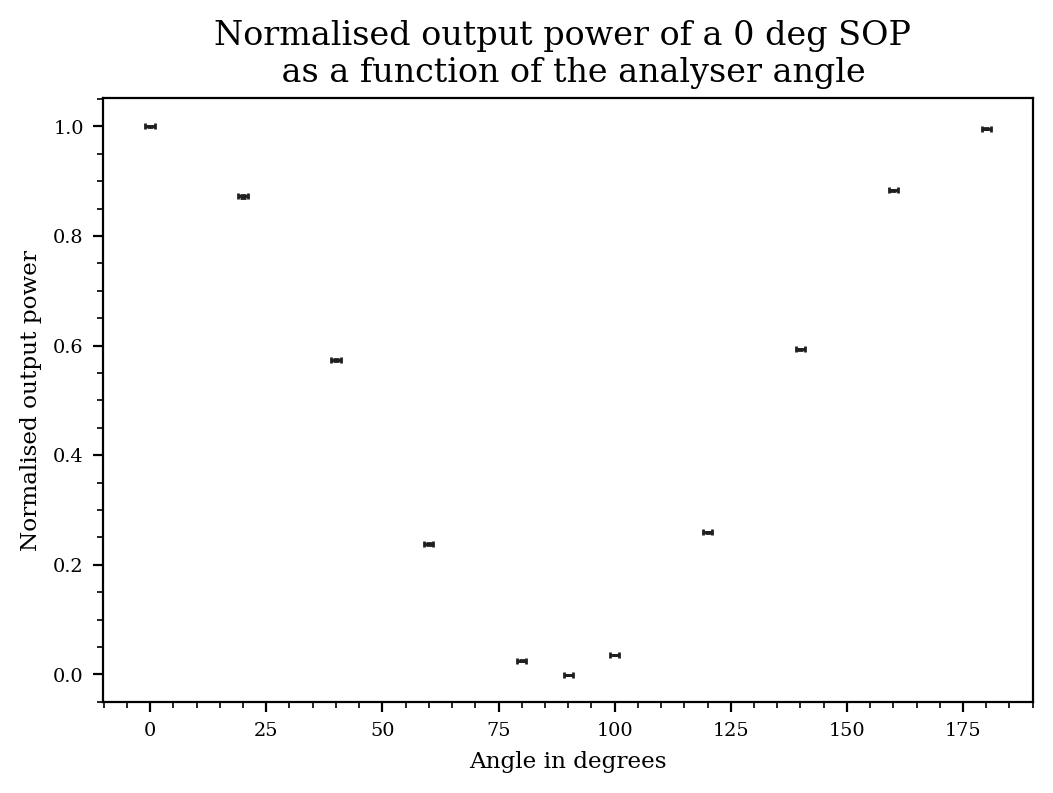

In [9]:
#plotting normalised plot

plt.errorbar(angle, norm_counts, yerr=norm_error, xerr=angle_err, fmt='none')      #plot number of counts against angles
plt.xlabel('Angle in degrees')                                                     #label x-axis
plt.ylabel('Normalised output power')                                              #label y-axis
plt.title('Normalised output power of a 0 deg SOP \n as a function of the analyser angle')
plt.show()

These errors are very small, which is nice. This clearly looks like a $\cos^2$ wave of amplitude 1, which is consistent with Malus' law as the measurements were normalised. Now, to verify that this indeed follows Malus' law, we can fit a general $\cos^2$ function:

$$ y = A \cos^2(kx + \phi) + C$$

where $A$ is the amplitude, $k$ is a factor multiplying the independent variable $x$, $\phi$ is the phase offset and $C$ is the y-offset. In our case, we should expect $A = k = 1$ and $\phi = C = 0$. We used the `scipy` function `optimize.curve_fit` to fit this function to our data.

fit function is then y = 0.9971 pm 0.0014 * cos^2 ((0.998 pm 0.002) * x + (0.9 pm 0.2)) + (-0.0000 pm 0.0006)


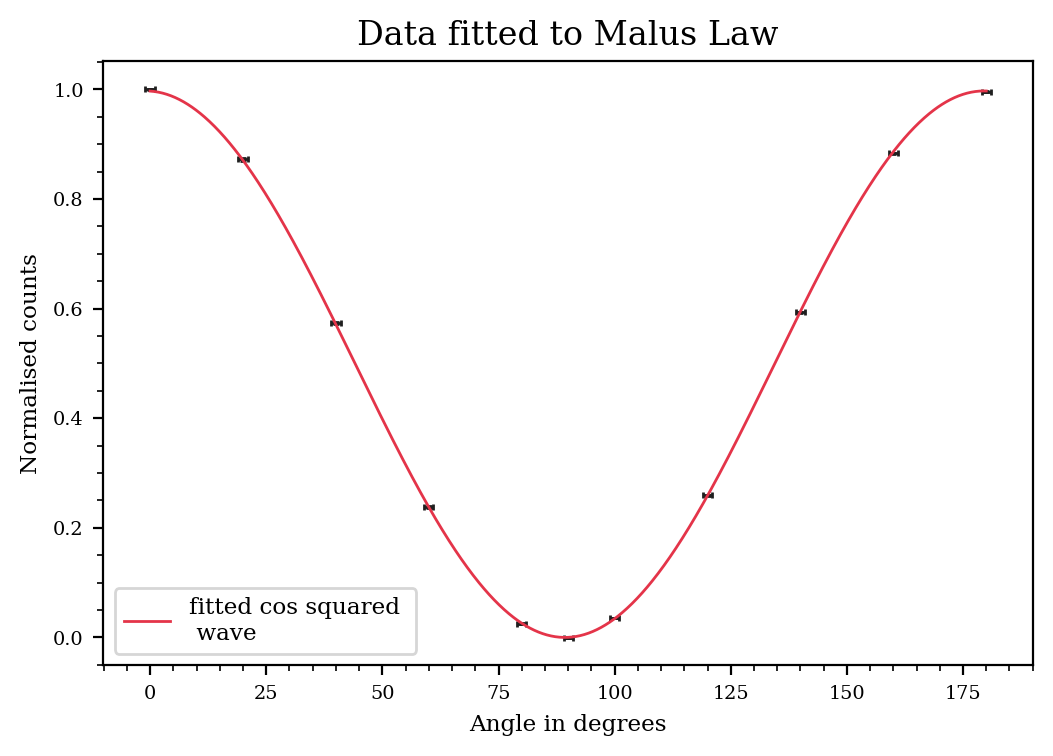

In [10]:
#define general cos^2 to fit data

def cos_sq_function(x, A, k, p, c):
    "general cos^2 function of the form y = A*cos^2(k*x + p) + c"
        # A is the amplitude, k is the multiplying coefficient inside the cosine term, p is the phase offset and c is the y-offset
        # x is the independent variable, y is the dependant variable
        
    X = np.radians(k*x + p) # we need to convert what's in the brackets into radians here because of np.cos
                            # p will then be in degrees and k in degrees^-1
    return A*(np.cos(X))**2 + c
    
# use scipy.optimize.curve_fit function to fit the cos^2 function to our data
# choice of initial guesses are:
    # A is amplitude so should be 1, k should be 1 and c, p chould be 0

popt, pcov = optimize.curve_fit(cos_sq_function, angle, norm_counts, p0 = [1, 1, 0, 0], sigma = norm_error)

fitted_A, fitted_k, fitted_p, fitted_c = popt                       #naming fitted parameters
err_A,    err_k,    err_p,    err_c    = np.sqrt(np.diagonal(pcov)) #naming associated errors 

print('fit function is then y = {0:.4f} pm {4:.2g} * cos^2 (({1:.3f} pm {5:.1g}) * x + ({2:.1f} pm {6:.1g})) + ({3:.4f} pm {7:.1g})'.format(fitted_A, fitted_k, fitted_p, fitted_c, err_A, err_k, err_p, err_c))


x = np.linspace(0, 180, 1000)                                                      #this is just a dummy variable
plt.errorbar(angle, norm_counts, yerr=norm_error, xerr=angle_err, fmt='none')      #plot number of counts against angles
plt.plot(x, cos_sq_function(x, fitted_A, fitted_k, fitted_p, fitted_c), label = 'fitted cos squared \n wave')
plt.xlabel('Angle in degrees')                                                     #label x-axis
plt.ylabel('Normalised counts')                                                    #label y-axis
plt.title('Data fitted to Malus Law')
plt.legend()
plt.show()

This is a pretty good fit. As the phase offset is in *degrees*, it is actually very small compared to the whole period (less than $1 \%$), and so very close to what was expected. The other parameters are also very close to what we would expect.

# Results

Finally, using the measurements in table 1 and normalising, we were able to find that the power output of a linearly polarised beam crossing a linear polariser can be predicted my Malus' law, as we could fit the function

$$N = (0.9971 \pm 0.0014) \times \cos^2[(0.998 \pm 0.002)\, \theta + (0.9 \pm 0.2)] + (0 \pm 0.0006)$$

to our data with a great accuracy, which is what was expected. Note that $\theta$ is in degrees here.

# Discussion

## Our errors

Our errors were very small here. We were able to achieve that by taking measurements multiple times in order reduce random errors. This was especially important as the detector fluctuated widly when measuring higher powers. This could come from multiple sources:
* the random error on the number of incoming photons increases with increasing photon number. As the photon rate is constant and they arrive independently from each other, this follows Poisson statistics and the counting error would then be $\sqrt{N}$, where N is the total number of photons arriving at the detector.
* the noise caused by the detector may be partially proportional to the measured power output

## Where Malus' law comes from

It's quite straightforward to see where this relation comes from, and is also described in the lab script (on p3). I always find it clearer to visualise things with a diagram, for example figure 3 from 

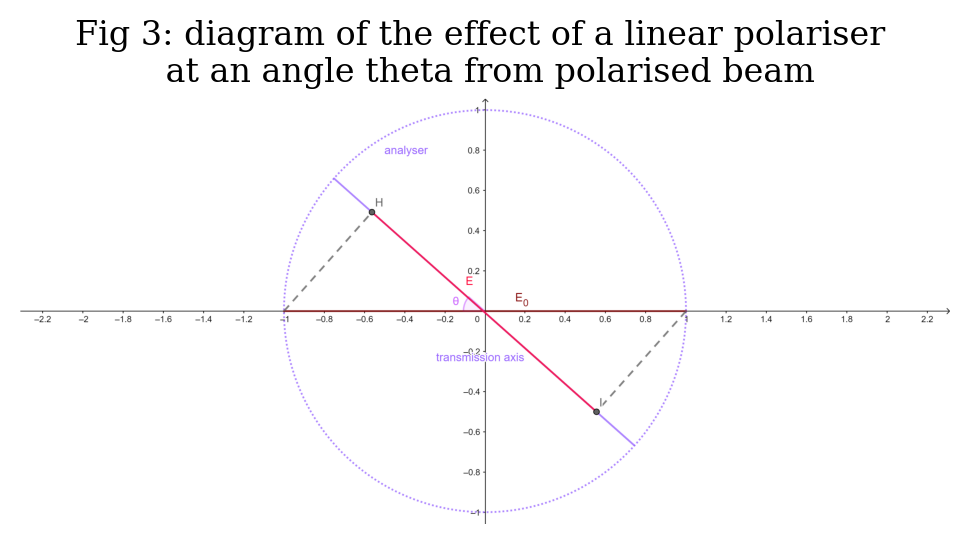

In [12]:
malus = plt.imread('geogebra-export.png')
plt.imshow(malus)
plt.axis('off')
plt.title('Fig 3: diagram of the effect of a linear polariser \n at an angle theta from polarised beam')
plt.show()

Here, we see that the original beam $E_0$ is projected onto the transmission axis, which means the outgoing beam will be $E$ (between points H and I). This means that

$$E = E_0 \cos (\theta)$$

And as the power output of our detector is proportional to the intensity of the beam, which is itself proportional to the electric field magnitude squared $E$ or $E_0$ (depending on which intensity we're talking about), we then again find Malus' law, as stated earlier.